In [ ]:
!pip install kagglehub
!pip install -q kagglehub
!pip install pandas

In [ ]:
import kagglehub
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("tanyachawla412/house-prices")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/house-prices


Importar otras librerias

In [ ]:
# 🔧 1. Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


**Modificaciones necesarias al Dataset**

Aproximar Number of Bedrooms a su entero mas cercano





In [ ]:
# Cargar el archivo CSV
df = pd.read_csv(f"{path}/House_price.csv")  # Asegúrate que el nombre sea correcto


In [ ]:
if 'Number of Bedrooms' in df.columns:
    df['Number of Bedrooms'] = df['Number of Bedrooms'].round().astype(int)
    print("\n✅ Columna 'Number of Bedrooms' redondeada y convertida a entero automáticamente.")
else:
    print("\n⚠️ La columna 'Number of Bedrooms' no fue encontrada.")



✅ Columna 'Number of Bedrooms' redondeada y convertida a entero automáticamente.


Aproximar Años de la casa a su entero mas cercano

In [ ]:

if 'House Age' in df.columns:
    df['House Age'] = df['House Age'].round().astype(int)
    print("\n✅ Columna 'House Age' redondeada y convertida a entero automáticamente.")
else:
    print("\n⚠️ La columna 'House Age' no fue encontrada.")





✅ Columna 'House Age' redondeada y convertida a entero automáticamente.


In [ ]:

# Redondear y convertir a entero
for col in ['Avg. Area Number of Bedrooms', 'Avg. Area Income', 'House Age']:
    if col in df:
        df[col] = df[col].round().astype(int)



Eliminar columnas que no son relevantes

In [ ]:
# Eliminar columnas que no aportan
df = df.drop(columns=['Address'], errors='ignore')
df = df.dropna(axis=1, how='all')
df = df.dropna(axis=0)  # filas con algún NaN


Mostrar el tipo de dato de cada columna, conviertiendo

In [ ]:
# Asegúrate de usar el nombre correcto (puede tener espacios)
df['Number of Bedrooms'] = df['Number of Bedrooms'].round().astype(int)

# Mostrar tipos de datos
print(df.dtypes)


Avg. Area Income        int64
House Age               int64
Number of Rooms       float64
Number of Bedrooms      int64
Area Population       float64
Price                 float64
dtype: object


In [ ]:

# ✅ Limpiar nombres de columnas (eliminar espacios sobrantes)
df.columns = df.columns.str.strip()

# Mostrar nombres de columnas por si tienen errores
print("\n🧾 Nombres de columnas detectadas:")
print(df.columns.tolist())




🧾 Nombres de columnas detectadas:
['Avg. Area Income', 'House Age', 'Number of Rooms', 'Number of Bedrooms', 'Area Population', 'Price']


Eliminar columnas vacias

In [ ]:
# Guardar una copia de los nombres
columnas_originales = df.columns.tolist()

# Eliminar columnas que estén completamente vacías (todas las filas NaN)
df = df.dropna(axis=1, how='all')

# Comparar con las originales para saber cuáles se eliminaron
columnas_eliminadas = list(set(columnas_originales) - set(df.columns.tolist()))

# Mostrar las columnas eliminadas
if columnas_eliminadas:
    print("\n🗑️ Columnas eliminadas por estar completamente vacías:")
    print(columnas_eliminadas)
else:
    print("\n✅ No se encontraron columnas completamente vacías.")



✅ No se encontraron columnas completamente vacías.


# Exploracion de los datos

**Variables dependientes e independientes**

En nuestro caso la variable deoendiente seria lo que buscamos predecir es decir la que depende de las otras variables en este caso seria el precio de la casa.
- Precio de la casa - Price

Las variables independientes sería en este caso, las que determinan las dependientes es decir:
- Ingresos de la vivienda - Avg Income
- Años de la vivienda  - House age
- Numero de habitaciones - Number of bedrooms
- Numero de habitnates de la zona  -Area Pulation

Creen un modelo de regresión lineal

In [ ]:
!pip install -q scikit-learn pandas


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# ✅ Cargar y limpiar columnas
df.columns = df.columns.str.strip()  # Limpia nombres

# ✅ Eliminar columnas que no aportan (como Address)
df = df.drop(columns=['Address'])

# ✅ Eliminar columnas completamente vacías
df = df.dropna(axis=1, how='all')

# ✅ Eliminar filas con valores faltantes si las hay
df = df.dropna()

# ✅ Convertir columnas a enteros si aplica
columnas_a_convertir = ['Number of Bedrooms', 'House Age', 'Number of Rooms']
for col in columnas_a_convertir:
    if col in df.columns:
        df[col] = df[col].round().astype(int)

# ✅ Separar variables independientes y dependiente
X = df.drop(columns=['Price'])  # Features
y = df['Price']                 # Target

# ✅ Separar en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Crear y entrenar el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# ✅ Predecir sobre el set de prueba
y_pred = modelo.predict(X_test)

# ✅ Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📉 MSE (error cuadrático medio):", mse)
print("📊 R² (coeficiente de determinación):", r2)

# ✅ Mostrar coeficientes del modelo
coeficientes = pd.DataFrame({'Variable': X.columns, 'Coeficiente': modelo.coef_})
print("\n🧾 Coeficientes del modelo:")
print(coeficientes)


KeyError: "['Address'] not found in axis"

In [ ]:
Regresion lineal entre Avg. Area Income y Price

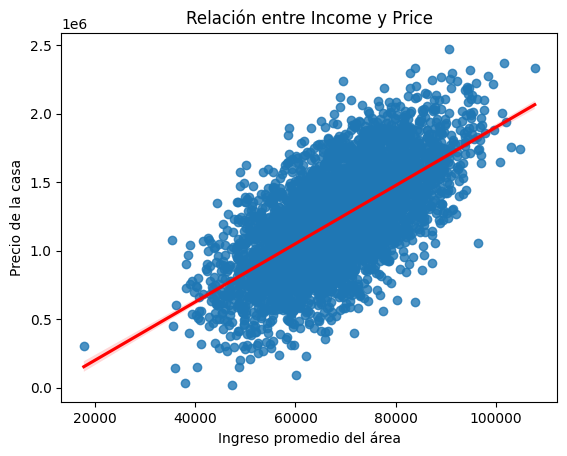

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de tener seaborn instalado: !pip install seaborn

# Gráfico con una sola variable independiente
sns.regplot(x='Avg. Area Income', y='Price', data=df, line_kws={"color": "red"})

plt.title("Relación entre Income y Price")
plt.xlabel("Ingreso promedio del área")
plt.ylabel("Precio de la casa")
plt.show()


Regresion lineal entre Años de la vivienda y precio

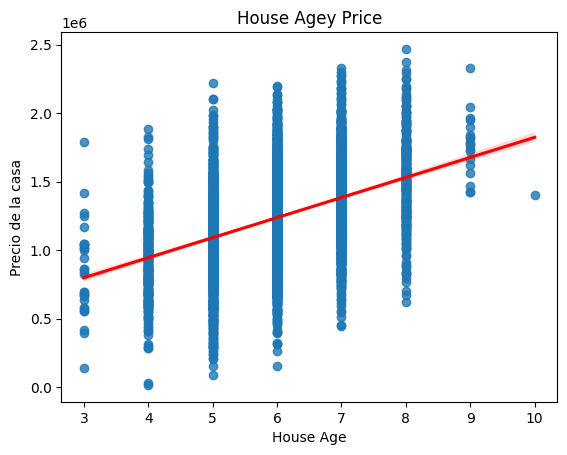

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de tener seaborn instalado: !pip install seaborn

# Gráfico con una sola variable independiente
sns.regplot(x='House Age', y='Price', data=df, line_kws={"color": "red"})

plt.title("House Agey Price")
plt.xlabel("House Age")
plt.ylabel("Precio de la casa")
plt.show()



Regesion linal entre numero de cuertos y precio


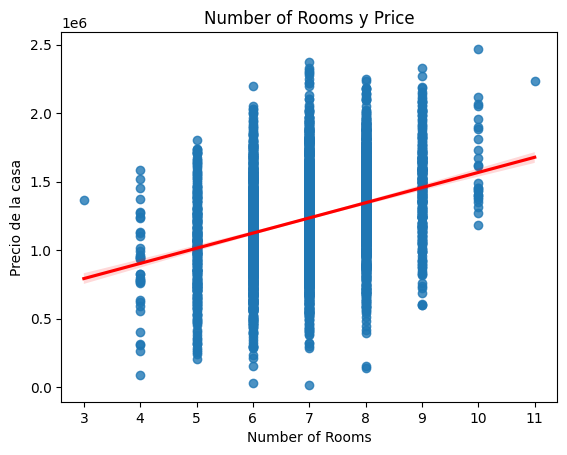

int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de tener seaborn instalado: !pip install seaborn

# Gráfico con una sola variable independiente
sns.regplot(x='Number of Rooms', y='Price', data=df, line_kws={"color": "red"})

plt.title("Number of Rooms y Price")
plt.xlabel("Number of Rooms")
plt.ylabel("Precio de la casa")
plt.show()

print(df['Number of Rooms'].dtype)


Regresion lineal entre numero de dormitorios y precio

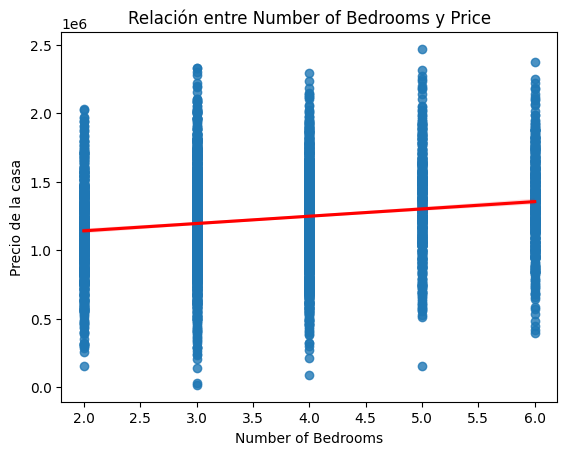

int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de tener seaborn instalado: !pip install seaborn

# Gráfico con una sola variable independiente
sns.regplot(x='Number of Bedrooms', y='Price', data=df, line_kws={"color": "red"})

plt.title("Relación entre Number of Bedrooms y Price")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Precio de la casa")
plt.show()

print(df['Number of Bedrooms'].dtype)  # Debe ser int o float


Regresion lineal entre Area population y Precio

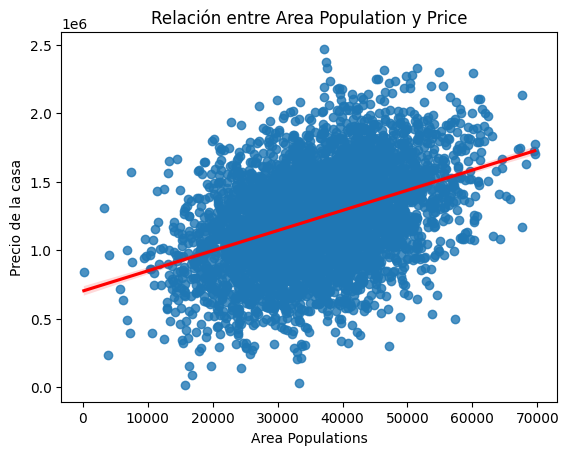

float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de tener seaborn instalado: !pip install seaborn

# Gráfico con una sola variable independiente
sns.regplot(x='Area Population', y='Price', data=df, line_kws={"color": "red"})

plt.title("Relación entre Area Population y Price")
plt.xlabel("Area Populations")
plt.ylabel("Precio de la casa")
plt.show()

print(df['Area Population'].dtype)  # Debe ser int o float


In [ ]:
for feature in ['Avg. Area Income', 'Area Population']:
    X = df[[feature]]
    y = df['Price']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)

    print(f"––– Regresión lineal con «{feature}» –––")
    print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
    print(f"R²:  {r2_score(y_test, y_pred):.4f}\n")


––– Regresión lineal con «Avg. Area Income» –––
MSE: 67785627526.84
R²:  0.4074

––– Regresión lineal con «Area Population» –––
MSE: 101184479602.42
R²:  0.1154



Arbol de decision

# Modelo de aprendizaje Supervisado



Instalamos librerias necesarias

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt



Seleccionamos las variables que identifacamos tienen una relaxion en regresion lienal

In [ ]:
# ✅ Selección de variables
X = df[['Avg. Area Income', 'Area Population']]
y = df['Price']



Dividimos el dataset entre entrenamiento y prueba (test)

In [ ]:
#División del dataset en entrenamiento y prueba con 0,2 y y un random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Crear y entrenar el modelo, definimos el xtrain  el ytrain
modelo = LinearRegression()
modelo.fit(X_train, y_train)

#Predecir precios en el set de prueba
y_pred = modelo.predict(X_test)



Evaluamos el modelo

In [ ]:
#Evaluación del modelo con mean_squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📉 Error cuadrático medio (MSE):", mse)
print("📊 Coeficiente de determinación (R²):", r2)

# Mostrar coeficientes del modelo creado
coeficientes = pd.DataFrame({'Variable': X.columns, 'Coeficiente': modelo.coef_})
print("\n🧾 Coeficientes del modelo:")
print(coeficientes)


📉 Error cuadrático medio (MSE): 51511849993.409546
📊 Coeficiente de determinación (R²): 0.549674496744488

🧾 Coeficientes del modelo:
           Variable  Coeficiente
0  Avg. Area Income    21.464654
1   Area Population    15.301796


Analizamos el modelo de predicción que acabamos de realizar

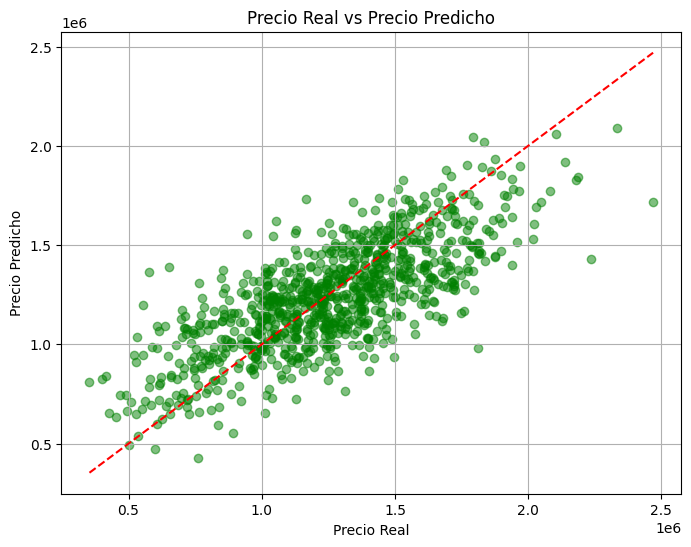

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title('Precio Real vs Precio Predicho')
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.grid(True)
plt.show()


Probar el modelo realizado con un arbol de decision

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Definir variables
X = df[['Avg. Area Income', 'Area Population']]
y = df['Price']

# 2. Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Crear el modelo
modelo_arbol = DecisionTreeRegressor(random_state=42)

# 4. Entrenar el modelo
modelo_arbol.fit(X_train, y_train)

# 5. Hacer predicciones
y_pred_arbol = modelo_arbol.predict(X_test)

# 6. Evaluar el modelo
mse_arbol = mean_squared_error(y_test, y_pred_arbol)
r2_arbol = r2_score(y_test, y_pred_arbol)

print("🌳 Árbol de Decisión - MSE:", mse_arbol)
print("🌳 Árbol de Decisión - R²:", r2_arbol)


🌳 Árbol de Decisión - MSE: 102823609272.6423
🌳 Árbol de Decisión - R²: 0.10109822112436362
